# 🏧💸**Credit EDA & Credit Score Calculation** 💳 💯
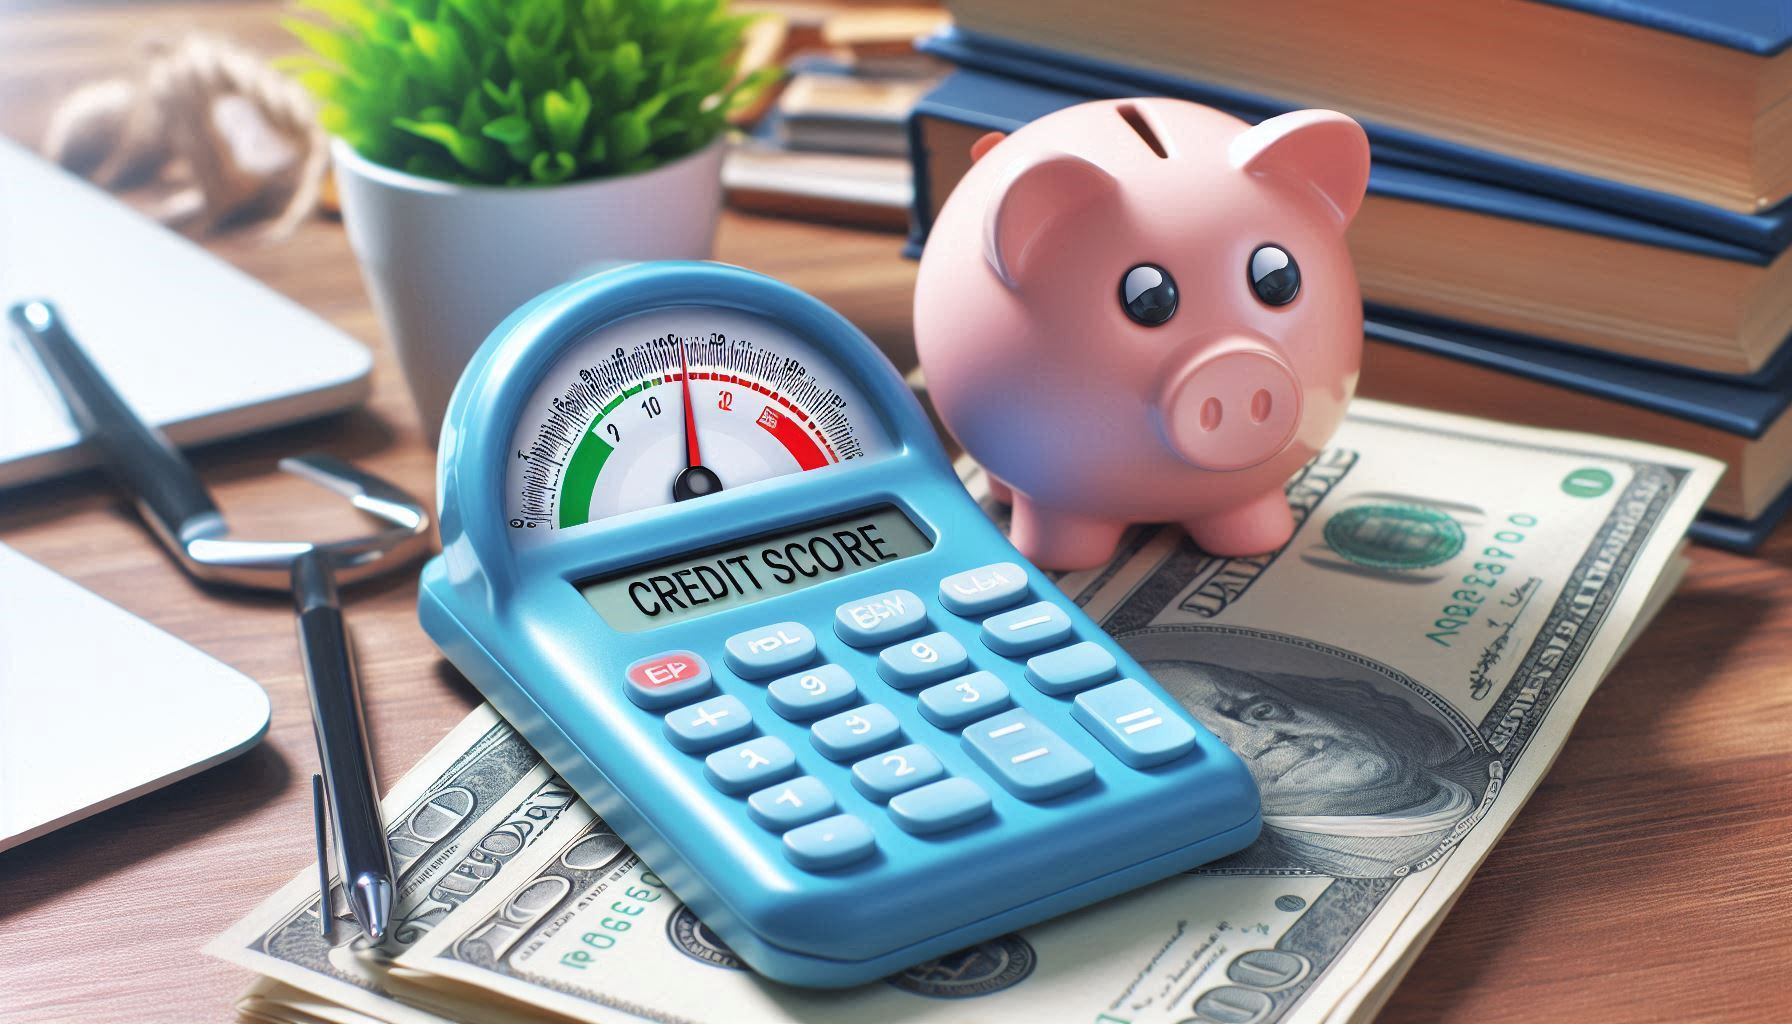

# **Problem Statement** 🔔

To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

# **Libraries**📑


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Importing Dataset**📩

In [164]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Credit_score (1).csv")
data.shape

(100000, 27)

In [165]:
df = data.copy()
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.94496,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625


# **EDA** 📊

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

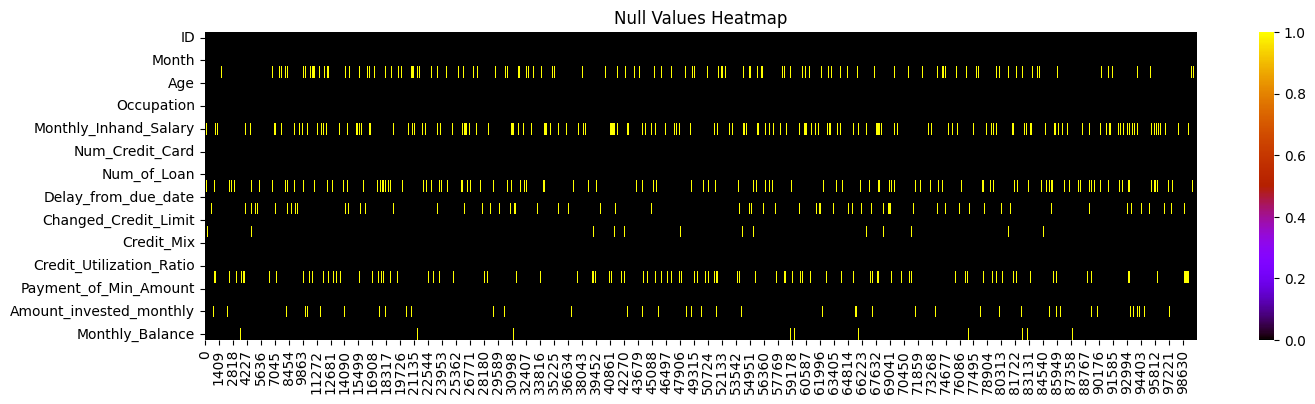

In [167]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(df.isnull().T, cmap='gnuplot')
plt.title('Null Values Heatmap')
plt.show()

###Name

In [168]:
#3Name - filling with ffill and bfill
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df["Name"].isna().sum()

0

###Age

In [169]:
# 4.Age
# Remove non-numeric characters from the 'Age' column
df['Age'] = df['Age'].str.replace(r'\D', '', regex=True)
df["Age"].dtype

dtype('O')

In [170]:
# Convert the cleaned 'Age' column to numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df["Age"].dtype

dtype('int64')

In [171]:
df["Age"].isna().sum()

0

In [172]:
#Checking the abnormal age
df[(df["Age"] <= 0) | (df["Age"] > 100)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media_Manager,34081.38_,NaN,8,...,5.0,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410092,Low_spent_Large_value_payments,298.1921581
113,0x16ab,CUS_0xff4,February,Poornimaf,500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.3232317,Low_spent_Small_value_payments,129.933631
122,0x16b8,CUS_0x33d2,March,Chalmersa,181,965-46-2491,Scientist,31993.78,2942.148333,6,...,1.0,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.2570885,Low_spent_Small_value_payments,274.8164466
219,0x1749,CUS_0x3edc,April,Williamso,995,663-16-3845,Accountant,43070.24,3622.186667,3,...,4.0,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487,High_spent_Medium_value_payments,506.722207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,3.0,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.7135802,High_spent_Small_value_payments,292.576093
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,_______,22620.79,1722.065833,7,...,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.0762934,Low_spent_Large_value_payments,337.13029
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,5.0,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763202,Low_spent_Small_value_payments,251.731594
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,...,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391927,High_spent_Large_value_payments,520.662207


In [173]:
# Replace invalid age values with NaN
df.loc[(df["Age"] <= 0) | (df["Age"] > 100), 'Age'] = np.nan
df["Age"].isna().sum()

2776

In [174]:
# filling null values
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df["Age"].isna().sum()

0

### SSN

In [175]:
# 5.ssn -Replace special character with NaN
df['SSN'] = df['SSN'].replace("#F%$D@*&8", np.nan)

In [176]:
# checking no of NaN values
df["SSN"].value_counts(dropna = False)

,count
SSN,
NaN,5572
078-73-5990,8
486-78-3816,8
750-67-7525,8
903-50-0305,8
...,...
856-06-6147,4
753-72-2651,4
331-28-1921,4


In [177]:
# filling with ffill and bfill
df['SSN'] = df.groupby('Customer_ID')['SSN'].ffill().bfill()

In [178]:
df["SSN"].isna().sum()

0

###Occupation

In [179]:
# 6.Occupation
df["Occupation"].isna().sum()

0

In [180]:
# replacing the spl characters with nan
df["Occupation"].replace("_______", np.nan)
df["Occupation"].isna().sum()

0

In [181]:
# filling nan values with ffill and bfill
df["Occupation"] = df.groupby("Customer_ID")["Occupation"].ffill().bfill()
df["Occupation"].isna().sum()

0

###Annual Income

In [182]:
#7 Annual_Income
df["Annual_Income"].isna().sum()

0

In [183]:
# treating the non numerical values
df['Annual_Income'] = df['Annual_Income'].str.replace(r'\D', '', regex=True)
df["Annual_Income"].dtype

dtype('O')

In [184]:
#converting to Numeric
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df["Annual_Income"].dtype

dtype('int64')

In [185]:
# filling null values
df["Annual_Income"] = df.groupby("Customer_ID")["Annual_Income"].ffill().bfill()
df["Annual_Income"].isna().sum()

0

### Monthly_Inhand_Salary

In [186]:
# 8.Monthly_Inhand_Salary
df["Monthly_Inhand_Salary"].isna().sum()

15002

In [187]:
#converting to numeric
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
#filling with ffill and bfill
df["Monthly_Inhand_Salary"] = df.groupby("Customer_ID")["Monthly_Inhand_Salary"].ffill().bfill()
df["Monthly_Inhand_Salary"].isna().sum()

0

### creating fillmode - function

In [188]:
# fillmode- function
def fill_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:
        return mode_value[0]  # Use the first mode if there are multiple modes
    else:
        return np.nan

### Num_of_Bank_Accounts

In [189]:
#9.Num_Bank_Accounts - replacing negative with 0
df["Num_Bank_Accounts"].replace(-1,0)

,Num_Bank_Accounts
0,3
1,3
2,3
3,3
4,3
...,...
99995,4
99996,4
99997,4
99998,4


In [190]:
# creating a new column and filling with mode
df["num_bank_accounts"] = df.groupby("Customer_ID")["Num_Bank_Accounts"].transform(fill_mode)
df["num_bank_accounts"].isna().sum()

0

### Num_Credit_Card

In [191]:
#10 Num_Credit_Card
df["Num_Credit_Card"].isna().sum()

0

In [192]:
# creating a new column and filling with mode
df["num_credit_card"] = df.groupby("Customer_ID")["Num_Credit_Card"].transform(fill_mode)
df["num_credit_card"].isna().sum()

0

###Interest_Rate

In [193]:
#11.Interest_Rate
df["Interest_Rate"].isna().sum()

0

In [194]:
df["Interest_Rate"].value_counts()

,count
Interest_Rate,
8,5012
5,4979
6,4721
12,4540
10,4540
...,...
4995,1
1899,1
2120,1


In [195]:
# creating a new column and filling with mode
df["interest_rate"] = df.groupby("Customer_ID")["Interest_Rate"].transform(fill_mode)
df["interest_rate"].min(), df["interest_rate"].max()

(1, 34)

###Num_of_Loan

In [196]:
# 12.Num_of_Loan
df["Num_of_Loan"].isna().sum()

0

In [197]:
df["Num_of_Loan"].value_counts()

,count
Num_of_Loan,
3,14386
2,14250
4,14016
0,10380
1,10083
...,...
1320_,1
103,1
1444,1


In [198]:
# treating the non-numeric values
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace(r'\D', '', regex=True)

In [199]:
# converting it to numeric
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors = "coerce")

In [200]:
df["Num_of_Loan"].dtype

dtype('int64')

In [201]:
# replacing negative values with 0
df["Num_of_Loan"].replace(-100,0,inplace =True)

In [202]:
# creating a new column and filling it with mode
df["num_of_loan"] = df.groupby("Customer_ID")["Num_of_Loan"].transform(fill_mode)
df["num_of_loan"].isna().sum()

0

### Type_of_Loan

In [203]:
# 13 Type_of_Loan
df["Type_of_Loan"].isna().sum()

11408

In [204]:
# filling the blanks with "no loan status"
df["Type_of_Loan"] = df["Type_of_Loan"].fillna("No Loan Status")
df["Type_of_Loan"].isna().sum()

0

### Delay_from_due_date

In [205]:
#14. Delay_from_due_date
# Replace values which are less than 0 with 0
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: 0 if x < 0 else x)

In [206]:
df["Delay_from_due_date"].isna().sum()

0

In [207]:
df["Delay_from_due_date"].value_counts(dropna = False)

,count
Delay_from_due_date,
15,3596
13,3424
8,3324
14,3313
10,3281
...,...
63,69
64,64
65,56


In [208]:
# creating a column and filling with mode
df["delay_from_due_date"] = df.groupby("Customer_ID")["Delay_from_due_date"].transform(fill_mode)

### Num_of_Delayed_Payment

In [209]:
# 15 Num_of_Delayed_Payment
df["Num_of_Delayed_Payment"].isna().sum()

7002

In [210]:
# treating non-numeric values
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True)

In [211]:
df["Num_of_Delayed_Payment"].dtype

dtype('O')

In [212]:
# converting it to numeric
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df["Num_of_Delayed_Payment"].dtype

dtype('float64')

In [213]:
# applying 0 to negative values
df["Num_of_Delayed_Payment"] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if x < 0 else x)

In [214]:
df["Num_of_Delayed_Payment"].isna().sum()

7002

In [215]:
# creating a new column and filling with mode
df["num_of_delayed_payment"] = df.groupby("Customer_ID")["Num_of_Delayed_Payment"].transform(fill_mode)
df["num_of_delayed_payment"].isna().sum()

0

In [216]:
df["num_of_delayed_payment"].min(),df["num_of_delayed_payment"].max()

(0.0, 28.0)

### Changed_credit_Limit

In [217]:
# 16  Changed_Credit_Limit- cleaning
pattern = r'_'
df["Changed_Credit_Limit"] = df['Changed_Credit_Limit'].replace(to_replace = pattern, value = np.nan, regex = True)

In [218]:
# convert to numerical
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors = "coerce")

In [219]:
# no of null values
df["Changed_Credit_Limit"].isna().sum()

2091

In [220]:
# filling ffill and bfill
df["Changed_Credit_Limit"] = df.groupby("Customer_ID")["Changed_Credit_Limit"].ffill().bfill()

In [221]:
# recheck for nulls
df["Changed_Credit_Limit"].isna().sum()

0

In [222]:
#checking min, max values
df["Changed_Credit_Limit"].min(), df["Changed_Credit_Limit"].max()

(-6.49, 36.97)

###Num_credit_Inquiries

In [223]:
#  17  Num_Credit_Inquiries
df["Num_Credit_Inquiries"].isna().sum()

1965

In [224]:
# creating a new column and filling the null with mode
df["num_credit_inquiries"] = df.groupby("Customer_ID")["Num_Credit_Inquiries"].transform(fill_mode)
df["num_credit_inquiries"].isna().sum()

0

In [225]:
#checking min, max values
df["num_credit_inquiries"].min(), df["num_credit_inquiries"].max()

(0.0, 17.0)

### Credit_Mix

In [226]:
#  18  Credit_Mix
df["Credit_Mix"].isna().sum()

0

In [227]:
# Cleaning
pattern = r'_'
df["Credit_Mix"] = df['Credit_Mix'].replace(to_replace = pattern, value = np.nan, regex = True)

In [228]:
# filling ffill and bfill
df["Credit_Mix"] = df.groupby("Customer_ID")["Credit_Mix"].ffill().bfill()

In [229]:
df["Credit_Mix"].value_counts(dropna = False)

,count
Credit_Mix,
Standard,45848
Good,30384
Bad,23768


###Outstanding_Debt

In [230]:
# 19  Outstanding_Debt
df["Outstanding_Debt"].isna().sum()

0

In [231]:
# Cleaning
pattern = r'_'
df["Outstanding_Debt"] = df['Outstanding_Debt'].replace(to_replace = pattern, value = np.nan, regex = True)

In [232]:
df["Outstanding_Debt"].dtype

dtype('O')

In [233]:
#Convert it to numeric
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors = "coerce")
df["Outstanding_Debt"].dtype

dtype('float64')

In [234]:
# filling with ffill and bfill
df["Outstanding_Debt"] = df.groupby("Customer_ID")["Outstanding_Debt"].ffill().bfill()

In [235]:
#  20  Credit_Utilization_Ratio - cleaning is not required
df["Credit_Utilization_Ratio"].isna().sum()

0

###Credit_History_Age

In [236]:
# 21  Credit_History_Age
df["Credit_History_Age"].isna().sum()

9030

In [237]:
# Check the datatype
df['Credit_History_Age'].dtype

dtype('O')

In [238]:
# Check for nulls
df['Credit_History_Age'].isna().sum()

9030

In [239]:
# Created a column by splitting the elements
df['Credit_History_Age_list'] = df['Credit_History_Age'].str.split()

In [240]:
df['Credit_History_Age_list'].head()

,Credit_History_Age_list
0,"[22, Years, and, 1, Months]"
1,NaN
2,"[22, Years, and, 3, Months]"
3,"[22, Years, and, 4, Months]"
4,"[22, Years, and, 5, Months]"


In [241]:
# Define a function to extract the year
def split_CRA(lst):
  #if type(lst) == float:
  if isinstance(lst, float):
    return 0
  else:
    return int(lst[0])

In [242]:
# Apply the function
df['Credit_History_Age_all'] = df['Credit_History_Age_list'].apply(split_CRA)

In [243]:
# Apply the function
df['credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age_all'].transform(lambda series: series.max())

In [244]:
#df.drop(columns=['Credit_History_Age', 'Credit_History_Age_list', 'Credit_History_Age_all'], inplace=True)

### Payment_of_Min_Amount

In [245]:
# 22  Payment_of_Min_Amount
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [246]:
# converting Nm to No
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", "No")

In [247]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,47674


###Total_EMI_per_month

In [248]:
# 23 Total_EMI_per_month - cleaning is required
df["Total_EMI_per_month"].isna().sum()

0

In [249]:
# 24  Amount_invested_monthly
df["Amount_invested_monthly"].isna().sum()

4479

In [250]:
df["Amount_invested_monthly"].dtype

dtype('O')

In [251]:
# cleaning str values
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.replace(r'\D', '', regex=True)

In [252]:
# converting it to numerical value
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors = "coerce")
df["Amount_invested_monthly"].dtype

dtype('float64')

In [253]:
df["Amount_invested_monthly"].isna().sum()

4479

In [254]:
# replacing nan with 0
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace(np.nan,0)

In [255]:
df["Amount_invested_monthly"].isna().sum()

0

###Payment_Behaviour

In [256]:
#  25  Payment_Behaviour
df["Payment_Behaviour"].isna().sum()

0

In [257]:
# replacing the spl characters with nan
df["Payment_Behaviour"] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)

In [258]:
df["Payment_Behaviour"].value_counts(dropna = False)

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
NaN,7600


In [259]:
# filling with ffill and bfill
df["Payment_Behaviour"] = df.groupby('Customer_ID')['Payment_Behaviour'].ffill().bfill()

###Monthly_Balance

In [260]:
# 26 Monthly_Balance
df["Monthly_Balance"].isna().sum()

1200

In [261]:
df["Monthly_Balance"].dtype

dtype('O')

In [262]:
# treating the spl characters
df["Monthly_Balance"] = df["Monthly_Balance"].str.replace(r'\D', '', regex=True)
#replacing with nan
df["Monthly_Balance"] = df["Monthly_Balance"].replace(np.nan,0)

In [263]:
df["Monthly_Balance"].dtype

dtype('O')

In [264]:
#converting into numeric
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors = "coerce")
df["Monthly_Balance"].dtype

dtype('float64')

###Dropping the extra Columns

In [265]:
df.drop(columns=["Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date",
                      "Num_of_Delayed_Payment","Num_Credit_Inquiries","Credit_History_Age","Credit_History_Age_list","Credit_History_Age_all"], inplace = True)


In [266]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_History_Age
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,High_spent_Small_value_payments,3.124941e+09,3,4,3,4,3,4.0,4.0,22
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Low_spent_Large_value_payments,2.846292e+09,3,4,3,4,3,4.0,4.0,22


In [267]:
df.shape

(100000, 27)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  int64  
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

# Feature Engineering
## cleaned and arranged Data





In [269]:
#deep copy
processed_df = df.copy()

In [270]:
processed_df.shape

(100000, 27)

In [271]:
# Renaming the newly created column
names_d = {"num_bank_accounts" : "Num_Bank_Accounts",
           "num_credit_card" : "Num_Credit_Card",
           "interest_rate" : "Interest_Rate",
           "num_of_loan" : "Num_of_Loan",
           "delay_from_due_date" : "Delay_from_due_date",
           "num_of_delayed_payment" : "Num_of_Delayed_Payment",
           "num_credit_inquiries" : "Num_Credit_Inquiries",
           "credit_History_Age" : "Credit_History_Age"}

processed_df = processed_df.rename(columns = names_d)

In [272]:
processed_df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_History_Age
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,High_spent_Small_value_payments,3.124941e+09,3,4,3,4,3,4.0,4.0,22
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Low_spent_Large_value_payments,2.846292e+09,3,4,3,4,3,4.0,4.0,22


In [273]:
# Changing the order of the column
ordered_column = [
    'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
    'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
]

df_cleaned = processed_df.reindex(columns=ordered_column)

In [274]:
df_cleaned.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,4.0,Good,809.98,26.822620,22,No,49.574949,8.041530e+09,High_spent_Small_value_payments,3.124941e+09
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,4.0,Good,809.98,31.944960,22,No,49.574949,1.182802e+09,Low_spent_Large_value_payments,2.846292e+09
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,4.0,Good,809.98,28.609352,22,No,49.574949,8.169952e+09,Low_spent_Medium_value_payments,3.312099e+09
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,4.0,Good,809.98,31.377862,22,No,49.574949,1.994581e+09,Low_spent_Small_value_payments,2.234513e+09
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,4.0,Good,809.98,24.797347,22,No,49.574949,4.142015e+09,High_spent_Medium_value_payments,3.414892e+08


## **Treating Month**

In [275]:
# Convert month names to month numbers and replace in the same column
df_cleaned['Month_num'] = pd.to_datetime(df_cleaned['Month'], format='%B').dt.month

## **Treating Credit_Mix**

In [276]:
df_cleaned['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [277]:
# Define a function for assigning numbers for Credit_Mix
def credit_mix(elem):
  if elem == "Good":
    return 2
  elif elem == "Standard":
    return 1
  else:
    return 0

In [278]:
# Apply the function using transform
df_cleaned['Credit_Mix_eq_no'] = df_cleaned['Credit_Mix'].transform(credit_mix)

## **Treating Payment_of_min_amount**

In [279]:
df_cleaned['Payment_of_Min_Amount'].unique()

array(['No', 'Yes'], dtype=object)

In [280]:
# Define a function for assigning numbers for Payment_of_Min_Amount
def Payment_of_Min_Amount(elem):
  if elem == 'Yes':
    return 1
  else:
    return 0

In [281]:
# Apply the function using transform
df_cleaned['Payment_of_Min_Amount_eq_no'] = df_cleaned['Payment_of_Min_Amount'].transform(Payment_of_Min_Amount)

## **Treating Payment_Behaviour**

In [282]:
# Define mapping
payment_behaviour_mapping = {
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6,
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3
}
# Apply mapping
df_cleaned['Payment_Behaviour_Num'] = df_cleaned['Payment_Behaviour'].map(payment_behaviour_mapping)

**Observation**



*   High Spending, Small Payments: Indicates a potential financial risk if this pattern persists, suggesting possible issues in covering expenses.

*   High Spending, Medium Payments: Shows higher risk, as the payment size may not be sufficient for the high spending level.

*   High Spending, Large Payments: Suggests more financial responsibility but still signals a potential risk due to high expenditures.
*   Low Spending, Small Payments: Reflects low financial risk, with minimal spending and payments.


*   Low Spending, Medium Payments: Indicates moderate risk with payments that exceed the spending amount.


*   Low Spending, Large Payments: Suggests underutilization of credit or conservative financial behavior.








# **Downloading the cleaned file**

In [283]:
# Download the cleaned file
df_cleaned.to_csv('Credit_score_cleaned', sep=",",index=False)

In [284]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  object 
 3   Name                         100000 non-null  object 
 4   Age                          100000 non-null  float64
 5   SSN                          100000 non-null  object 
 6   Occupation                   100000 non-null  object 
 7   Annual_Income                100000 non-null  int64  
 8   Monthly_Inhand_Salary        100000 non-null  float64
 9   Num_Bank_Accounts            100000 non-null  int64  
 10  Num_Credit_Card              100000 non-null  int64  
 11  Interest_Rate                100000 non-null  int64  
 12  Num_of_Loan                  100000 non-null  int64  
 13  

In [285]:
df_cleaned.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_num,Credit_Mix_eq_no,Payment_of_Min_Amount_eq_no,Payment_Behaviour_Num
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,22,No,49.574949,8.041530e+09,High_spent_Small_value_payments,3.124941e+09,1,2,0,4
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412,1824.843333,3,...,22,No,49.574949,1.182802e+09,Low_spent_Large_value_payments,2.846292e+09,2,2,0,3


In [286]:
# Columns that are in int and float datatype
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes != 'object':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

5. Age: (46, dtype('float64'))
8. Annual_Income: (13701, dtype('int64'))
9. Monthly_Inhand_Salary: (13235, dtype('float64'))
10. Num_Bank_Accounts: (12, dtype('int64'))
11. Num_Credit_Card: (12, dtype('int64'))
12. Interest_Rate: (34, dtype('int64'))
13. Num_of_Loan: (10, dtype('int64'))
15. Delay_from_due_date: (63, dtype('int64'))
16. Num_of_Delayed_Payment: (29, dtype('float64'))
17. Changed_Credit_Limit: (3634, dtype('float64'))
18. Num_Credit_Inquiries: (18, dtype('float64'))
20. Outstanding_Debt: (12203, dtype('float64'))
21. Credit_Utilization_Ratio: (99998, dtype('float64'))
22. Credit_History_Age: (34, dtype('int64'))
24. Total_EMI_per_month: (14950, dtype('float64'))
25. Amount_invested_monthly: (91048, dtype('float64'))
27. Monthly_Balance: (97123, dtype('float64'))
28. Month_num: (8, dtype('int32'))
29. Credit_Mix_eq_no: (3, dtype('int64'))
30. Payment_of_Min_Amount_eq_no: (2, dtype('int64'))
31. Payment_Behaviour_Num: (6, dtype('int64'))


In [287]:
# Columns that are in object datatype
for i, elem in (enumerate(df_cleaned.columns)):
  if df_cleaned[elem].dtypes == 'O':
    print(f"{i+1}. {elem}: {df_cleaned[elem].nunique(), df_cleaned[elem].dtypes}")

1. ID: (100000, dtype('O'))
2. Customer_ID: (12500, dtype('O'))
3. Month: (8, dtype('O'))
4. Name: (10139, dtype('O'))
6. SSN: (12500, dtype('O'))
7. Occupation: (16, dtype('O'))
14. Type_of_Loan: (6261, dtype('O'))
19. Credit_Mix: (3, dtype('O'))
23. Payment_of_Min_Amount: (2, dtype('O'))
26. Payment_Behaviour: (6, dtype('O'))


## **Aggregate data at customer level**

In [288]:
# Creating a dictionary for aggregation at Customer_ID level
agg_dict = {
    'ID': 'first',
     # Grouped by on Customer_ID so not included
    'Name': 'first',
    'Age': 'first',
    'SSN': 'first',
    'Occupation': 'first',
    'Annual_Income': 'first',
    'Monthly_Inhand_Salary': 'first',
    'Num_Bank_Accounts': 'first',
    'Num_Credit_Card': 'first',
    'Interest_Rate': 'first',
    'Num_of_Loan': 'first',
    'Type_of_Loan': 'first',
    'Delay_from_due_date': 'mean',
    'Num_of_Delayed_Payment': 'first',
    'Changed_Credit_Limit': 'mean',
    'Num_Credit_Inquiries': 'first',
    'Credit_Mix': 'first',
    'Outstanding_Debt': 'first',
    'Credit_Utilization_Ratio': 'mean',
    'Credit_History_Age': 'first',
    'Payment_of_Min_Amount': 'first',
    'Total_EMI_per_month': 'first',
    'Amount_invested_monthly': 'mean',
    # Payment_Behaviour not included
    'Monthly_Balance': 'mean',
    'Credit_Mix_eq_no': 'first',
    'Payment_of_Min_Amount_eq_no': 'first',
    'Payment_Behaviour_Num': 'mean'
}
df_aggregated = df_cleaned.groupby('Customer_ID').agg(agg_dict).reset_index()

In [289]:
df_aggregated.head()

,Customer_ID,ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_eq_no,Payment_of_Min_Amount_eq_no,Payment_Behaviour_Num
0,CUS_0x1000,0x1628a,Alistair Barrf,17.0,913-74-1218,Lawyer,3062594,2706.161667,6,5,...,1562.91,33.477546,10,Yes,42.941090,3.168925e+09,3.353753e+09,0,1,3.750
1,CUS_0x1009,0x66a2,Arunah,25.0,063-67-6938,Mechanic,5231268,4250.390000,6,5,...,202.68,29.839984,31,No,108.366467,2.924668e+09,4.287432e+09,1,0,4.500
2,CUS_0x100b,0x1ef6,Shirboni,18.0,238-62-0395,Media_Manager,11378139,9549.782500,1,4,...,1030.20,34.841449,15,No,0.000000,3.790400e+09,6.664021e+09,2,0,3.750
3,CUS_0x1011,0x17646,Schneyerh,43.0,793-05-8223,Doctor,5891847,5208.872500,3,3,...,473.14,27.655897,15,Yes,123.434939,4.227127e+09,3.326428e+09,1,1,3.000
4,CUS_0x1013,0x243ea,Cameront,43.0,930-49-9615,Mechanic,9862098,7962.415000,3,3,...,1233.51,31.933940,17,No,228.018084,2.983629e+09,4.163652e+09,2,0,4.375


In [290]:
# Download the cleaned file
df_aggregated.to_csv('Credit_score_cleaned_aggregated', sep=",",index=False)

In [291]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  12500 non-null  object 
 1   ID                           12500 non-null  object 
 2   Name                         12500 non-null  object 
 3   Age                          12500 non-null  float64
 4   SSN                          12500 non-null  object 
 5   Occupation                   12500 non-null  object 
 6   Annual_Income                12500 non-null  int64  
 7   Monthly_Inhand_Salary        12500 non-null  float64
 8   Num_Bank_Accounts            12500 non-null  int64  
 9   Num_Credit_Card              12500 non-null  int64  
 10  Interest_Rate                12500 non-null  int64  
 11  Num_of_Loan                  12500 non-null  int64  
 12  Type_of_Loan                 12500 non-null  object 
 13  Delay_from_due_d

In [292]:
# Columns that are in int and float datatype
for i, elem in (enumerate(df_aggregated.columns)):
  if df_aggregated[elem].dtypes != 'object':
    print(f"{i+1}. {elem}: {df_aggregated[elem].nunique(), df_aggregated[elem].dtypes}")

4. Age: (44, dtype('float64'))
7. Annual_Income: (12489, dtype('int64'))
8. Monthly_Inhand_Salary: (12489, dtype('float64'))
9. Num_Bank_Accounts: (12, dtype('int64'))
10. Num_Credit_Card: (12, dtype('int64'))
11. Interest_Rate: (34, dtype('int64'))
12. Num_of_Loan: (10, dtype('int64'))
14. Delay_from_due_date: (63, dtype('float64'))
15. Num_of_Delayed_Payment: (29, dtype('float64'))
16. Changed_Credit_Limit: (4796, dtype('float64'))
17. Num_Credit_Inquiries: (18, dtype('float64'))
19. Outstanding_Debt: (12203, dtype('float64'))
20. Credit_Utilization_Ratio: (12500, dtype('float64'))
21. Credit_History_Age: (34, dtype('int64'))
23. Total_EMI_per_month: (11114, dtype('float64'))
24. Amount_invested_monthly: (12500, dtype('float64'))
25. Monthly_Balance: (12282, dtype('float64'))
26. Credit_Mix_eq_no: (3, dtype('int64'))
27. Payment_of_Min_Amount_eq_no: (2, dtype('int64'))
28. Payment_Behaviour_Num: (41, dtype('float64'))


In [293]:
# Columns that are in object datatype
for i, elem in (enumerate(df_aggregated.columns)):
  if df_aggregated[elem].dtypes == 'O':
    print(f"{i+1}. {elem}: {df_aggregated[elem].nunique(), df_aggregated[elem].dtypes}")

1. Customer_ID: (12500, dtype('O'))
2. ID: (12500, dtype('O'))
3. Name: (10139, dtype('O'))
5. SSN: (12500, dtype('O'))
6. Occupation: (16, dtype('O'))
13. Type_of_Loan: (6261, dtype('O'))
18. Credit_Mix: (3, dtype('O'))
22. Payment_of_Min_Amount: (2, dtype('O'))


In [294]:
# Display the range of attributes
print("Range of attributes:")
print("-" * 20)
df_aggregated.describe(include='all').T

Range of attributes:
--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,12500,12500,CUS_0x1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,12500,12500,0x1628a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,12500,10139,Jessicad,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,12500.0,NaN,NaN,NaN,33.02992,10.770496,14.0,24.0,33.0,41.0,95.0
SSN,12500,12500,913-74-1218,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,12500,16,_______,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,12500.0,NaN,NaN,NaN,8284401795642.241211,261644154591651.09375,7908.0,1814001.75,3803281.0,8048646.75,13358115000000002.0
Monthly_Inhand_Salary,12500.0,NaN,NaN,NaN,4208.493531,3194.903138,303.645417,1628.941875,3103.639167,5971.357917,15204.63333
Num_Bank_Accounts,12500.0,NaN,NaN,NaN,5.36752,2.593412,-1.0,3.0,5.0,7.0,10.0
Num_Credit_Card,12500.0,NaN,NaN,NaN,5.53272,2.067576,0.0,4.0,5.0,7.0,11.0


In [295]:
# Display the statistical summary
print("statistical summary:")
print("-" * 20)
df_aggregated.describe().T

statistical summary:
--------------------


,count,mean,std,min,25%,50%,75%,max
Age,12500.0,3.302992e+01,1.077050e+01,1.400000e+01,2.400000e+01,3.300000e+01,4.100000e+01,9.500000e+01
Annual_Income,12500.0,8.284402e+12,2.616442e+14,7.908000e+03,1.814002e+06,3.803281e+06,8.048647e+06,1.335812e+16
Monthly_Inhand_Salary,12500.0,4.208494e+03,3.194903e+03,3.036454e+02,1.628942e+03,3.103639e+03,5.971358e+03,1.520463e+04
Num_Bank_Accounts,12500.0,5.367520e+00,2.593412e+00,-1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01
Num_Credit_Card,12500.0,5.532720e+00,2.067576e+00,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,12500.0,1.453208e+01,8.741636e+00,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01
Num_of_Loan,12500.0,3.532880e+00,2.446442e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00
Delay_from_due_date,12500.0,2.105056e+01,1.476170e+01,0.000000e+00,1.000000e+01,1.800000e+01,2.800000e+01,6.200000e+01
Num_of_Delayed_Payment,12500.0,1.326664e+01,6.195202e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.800000e+01,2.800000e+01
Changed_Credit_Limit,12500.0,1.038930e+01,6.544067e+00,-1.070000e+00,5.450000e+00,9.365000e+00,1.465625e+01,3.139500e+01


# **Exploratory Data Analysis** 🧐

## Univariate Analysis

In [296]:
blue_palette = ['#00008B', '#0000FF', '#1E90FF', '#4169E1', '#4682B4', '#87CEEB', '#00BFFF', '#00CED1', '#ADD8E6', '#B0E0E6']

In [297]:
columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

for elem in columns:
  print(f"Column Name: {elem}")
  print(data[elem].value_counts())
  print()
  print(round(((data[elem].value_counts(normalize=True)) * 100),2))
  print("_" * 35)
  print()

Column Name: Occupation
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

Occupation
_______          7.06
Lawyer           6.58
Architect        6.36
Engineer         6.35
Scientist        6.30
Mechanic         6.29
Accountant       6.27
Developer        6.24
Media_Manager    6.23
Teacher          6.22
Entrepreneur     6.17
Doctor           6.09
Journalist       6.08
Manager          5.97
Musician         5.91
Writer           5.88
Name: proportion, dtype: float64
___________________________________

Column Name: Credit_Mix
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

Credit_Mix
Standard

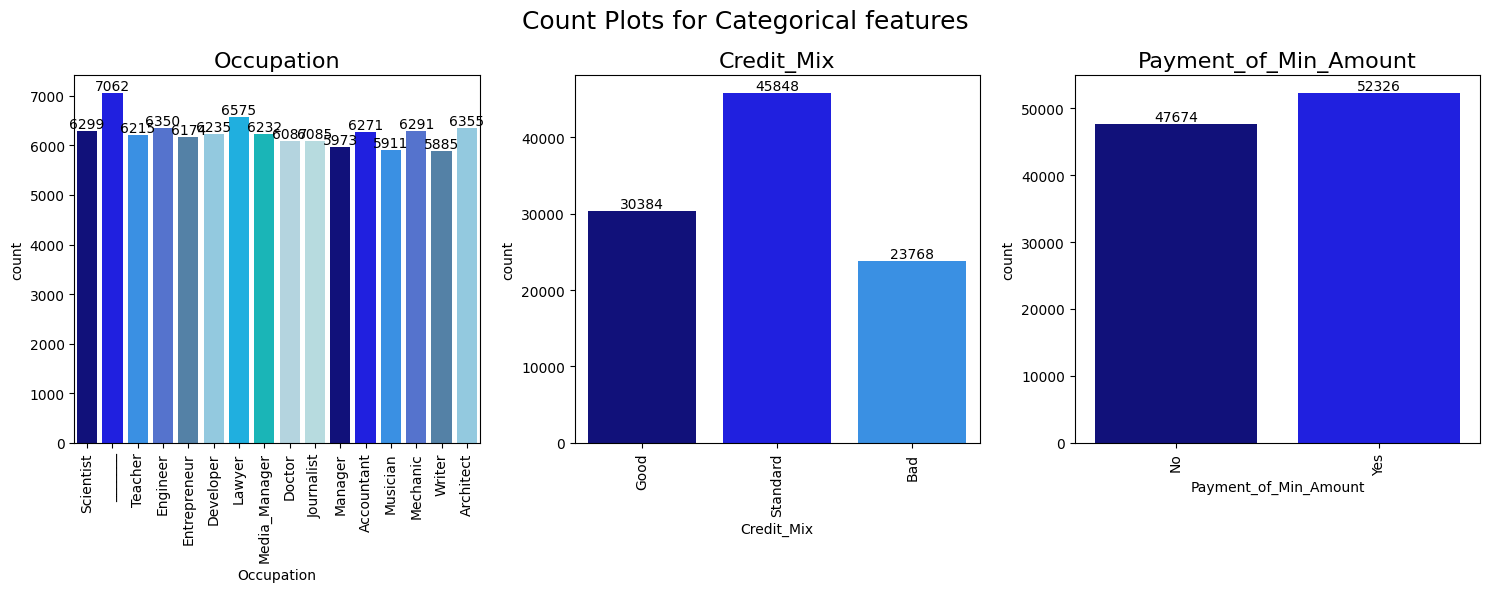

In [298]:
# Count Plots for Categorical features
columns = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

plt.figure(figsize=(15,6))
for i, elem in enumerate(columns):
  plt.subplot(1,len(columns),i+1)
  label = sns.countplot(data = df, x = elem, palette = blue_palette)
  for i in label.containers:
    label.bar_label(i)

  plt.xticks(rotation = 90)
  plt.ylabel('count')
  plt.title(elem, fontsize=16)

plt.suptitle("Count Plots for Categorical features", fontsize = 18)
plt.tight_layout()
plt.show()

**Observation**


*   **Occupation:** The data shows an even distribution of individuals in high-education or professional roles such as Scientists, Engineers, and Lawyers, indicating a strong representation of people with specialized skills.
*   **Credit Mix:** The majority of individuals have a "Standard" credit mix, accounting for over a third of the dataset, while "Good" and "Bad" credit mixes are less common, suggesting a generally positive credit behavior.
*   **Payment of Minimum Amount:** More than half of the population (52.33%) consistently pays the minimum amount on their debts, which might indicate careful debt management.




In [300]:
# Creating numerical_df
numerical_df = df_aggregated[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                              'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                              'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                              'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]


In [301]:
# Skewness Coefficient
numerical_df
print("Skewness Coefficient")
print("-" * 20)
print(numerical_df.skew().round(4))

Skewness Coefficient
--------------------
Age                          0.1686
Annual_Income               35.1829
Monthly_Inhand_Salary        1.1276
Num_Bank_Accounts           -0.1906
Num_Credit_Card              0.2259
Interest_Rate                0.4963
Num_of_Loan                  0.4457
Delay_from_due_date          0.9860
Num_of_Delayed_Payment      -0.2234
Changed_Credit_Limit         0.7189
Num_Credit_Inquiries         0.4162
Outstanding_Debt             1.2077
Credit_Utilization_Ratio     0.2752
Credit_History_Age          -0.0490
Total_EMI_per_month          7.4034
Amount_invested_monthly      0.3646
Monthly_Balance             37.2320
dtype: float64


**Observation**



*   Annual_Income (35.18) and Monthly_Balance (37.23) show very high positive skewness, indicating the presence of a few individuals with extremely high values.

*   Total_EMI_per_month (7.40) also displays significant positive skewness, highlighting outliers with higher EMIs.
*   Monthly_Inhand_Salary (1.13) and Outstanding_Debt (1.21) show moderate positive skewness.

*   Num_Bank_Accounts and Num_of_Delayed_Payment have slight negative skewness, suggesting most individuals have fewer bank accounts or delayed payments than average.









# **Bivariate Analysis** 📊

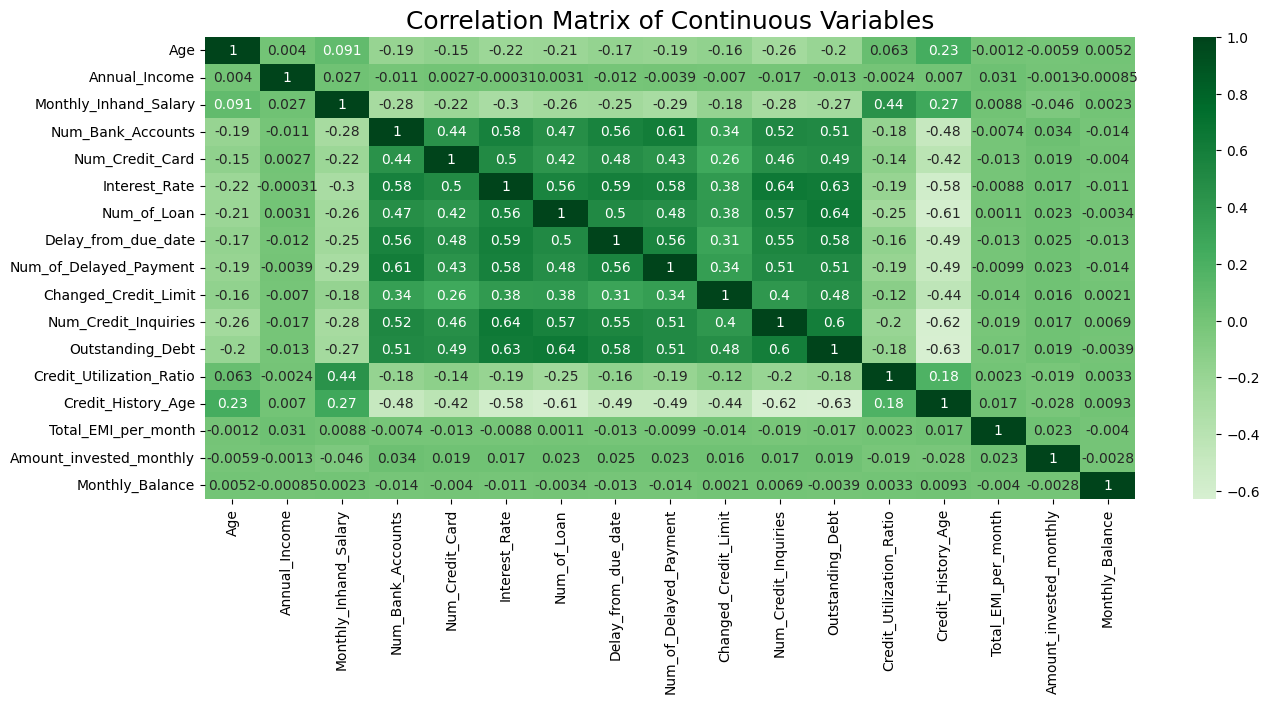

In [302]:
# Correlation Matrix of Continuous Variables
plt.figure(figsize=(15, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Greens',center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

**Observation**



*   Credit Utilization & Credit Cards: There is a strong positive correlation (0.56) between the number of credit cards and credit utilization.


*   Debt & Delayed Payments: Outstanding debt and the number of delayed payments show a moderately strong correlation (0.58).

*   Loans & Interest Rates: A strong correlation (0.56) exists between interest rates and the number of loans.


*   Age & Credit History: Age and credit history are positively correlated (0.23), meaning older individuals tend to have longer credit histories.



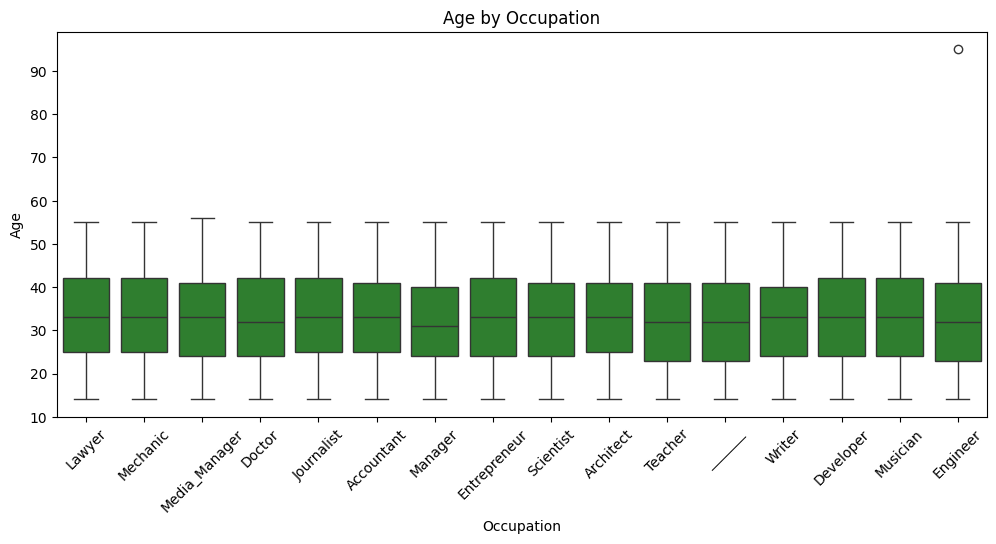

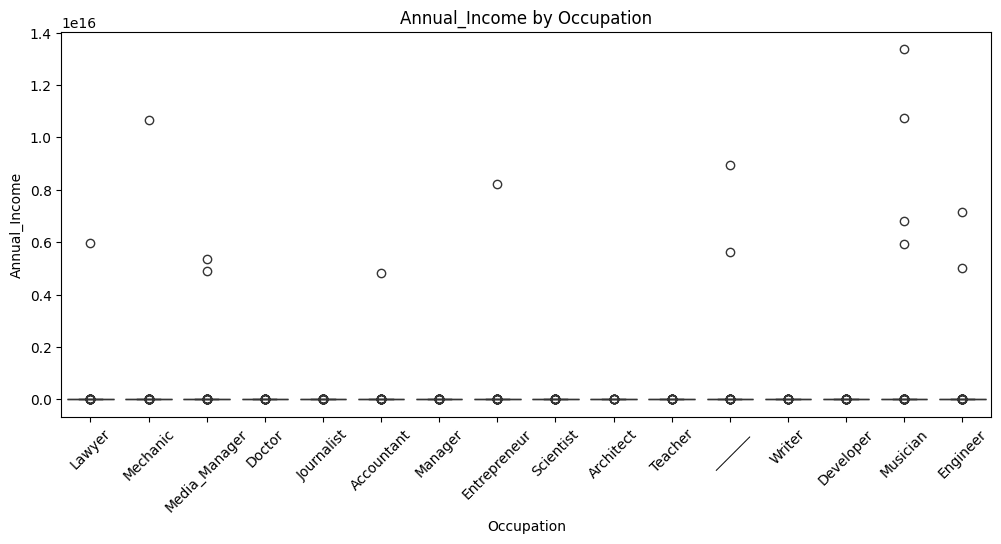

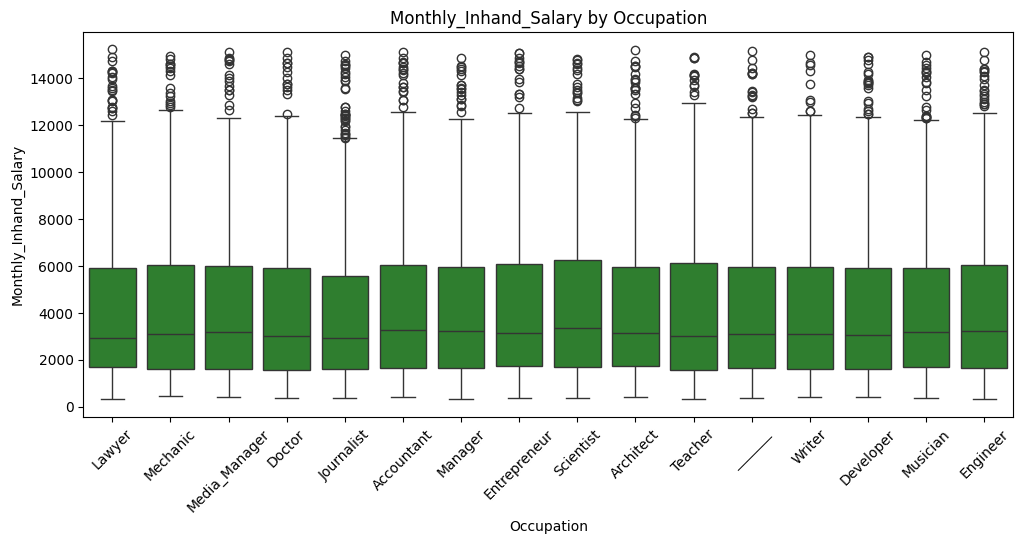

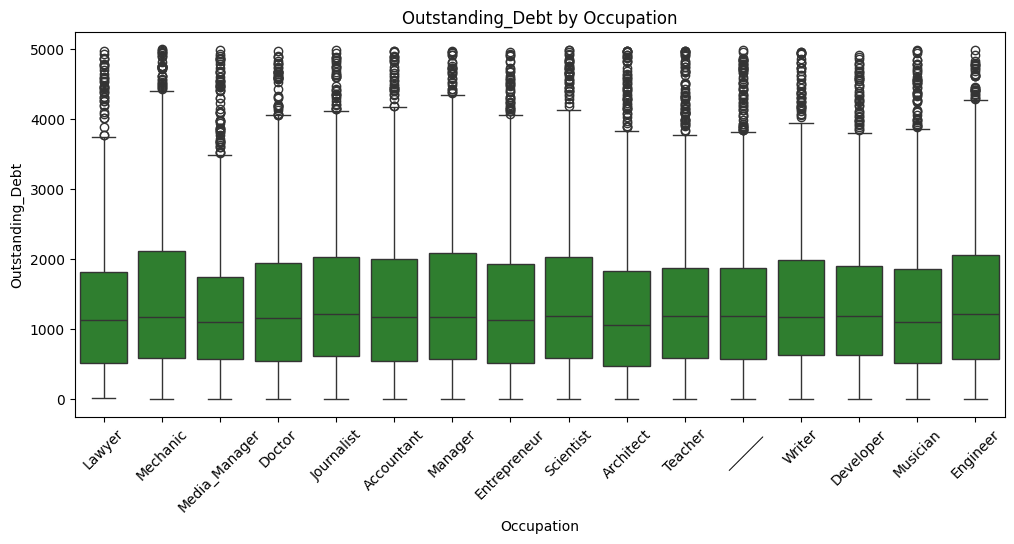

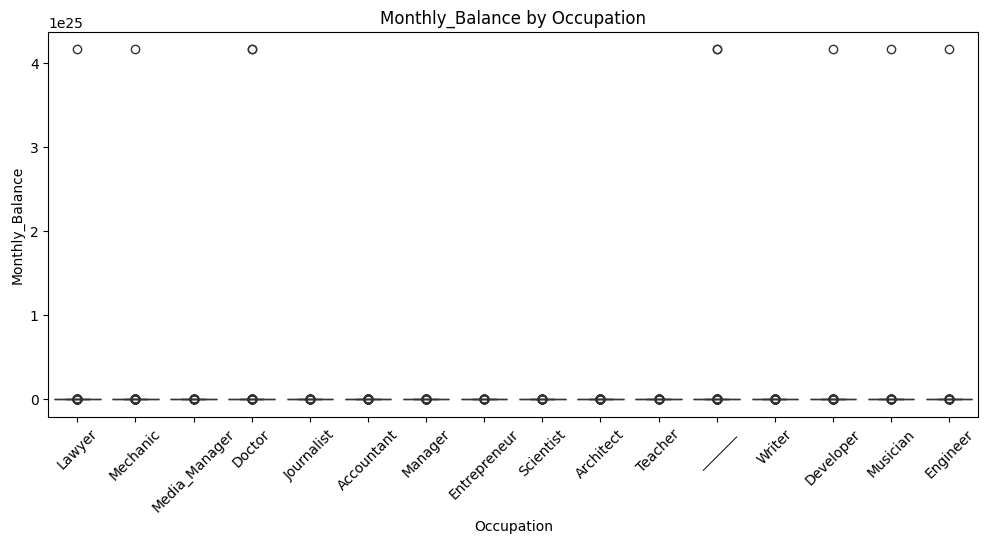

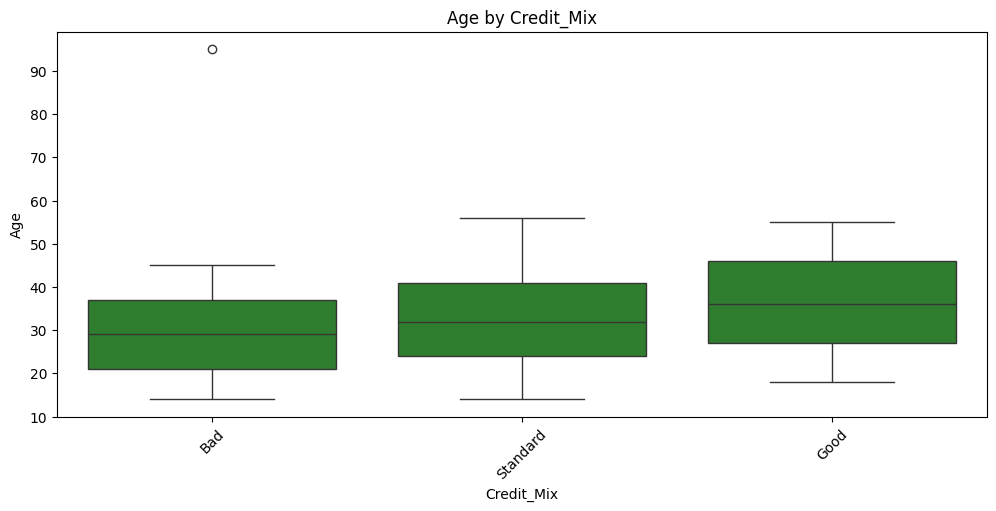

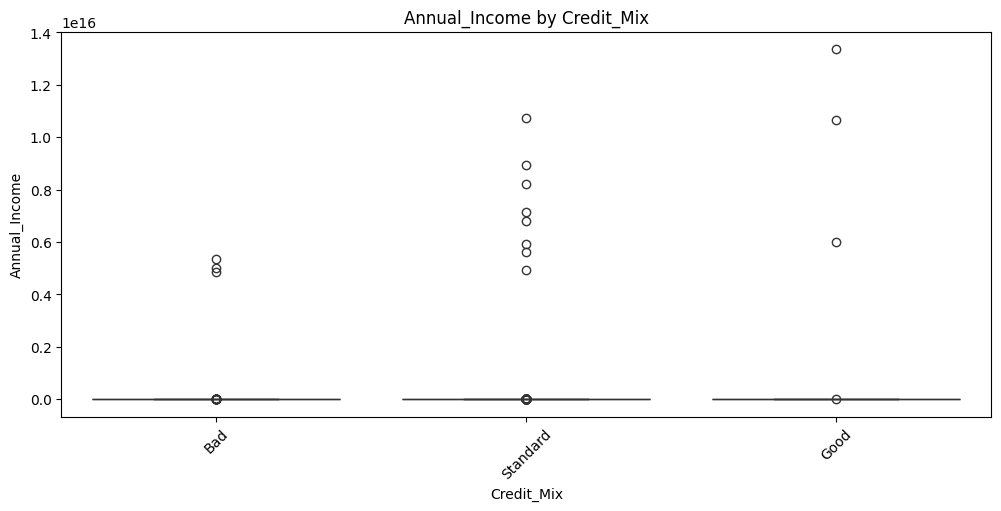

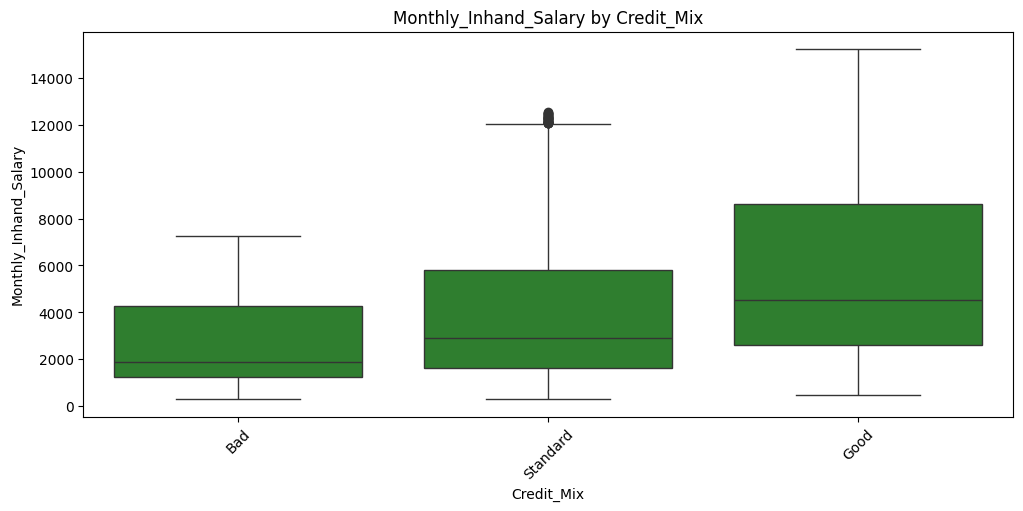

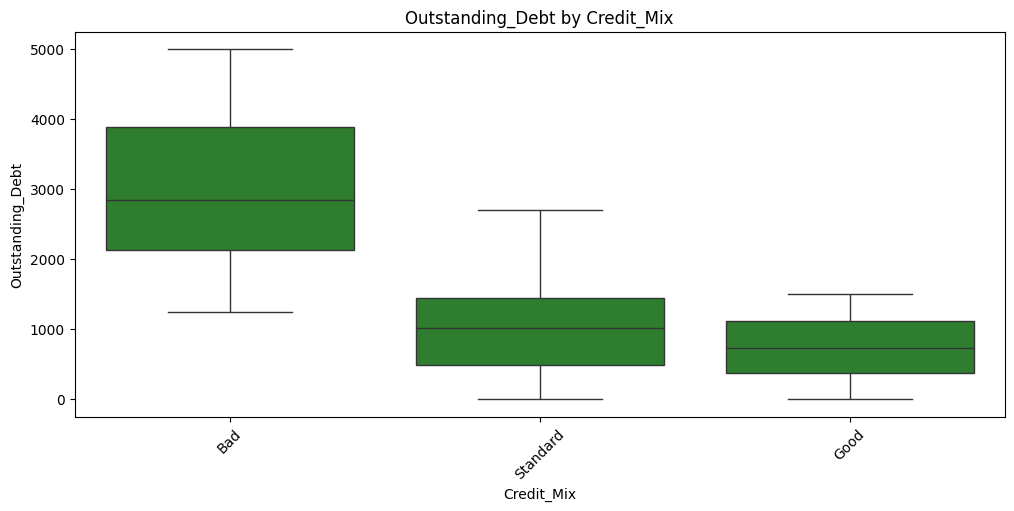

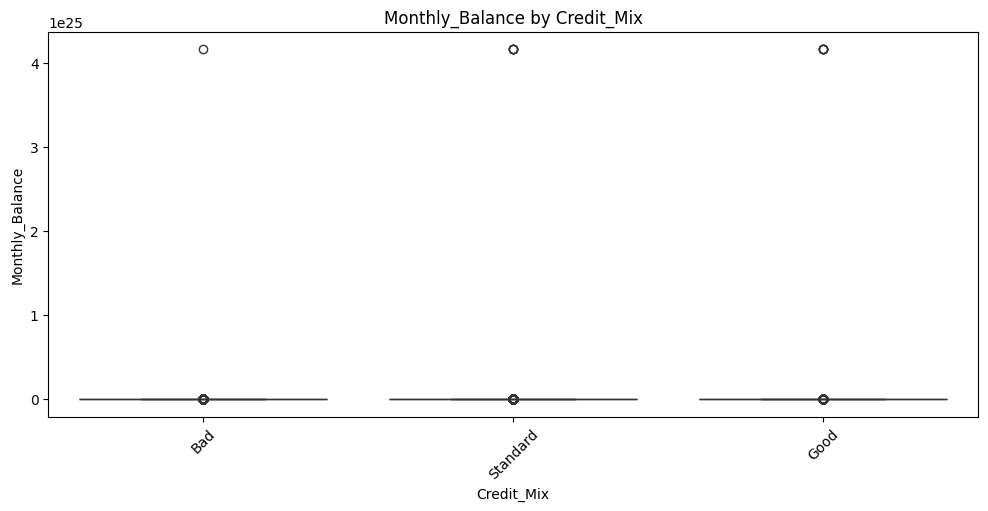

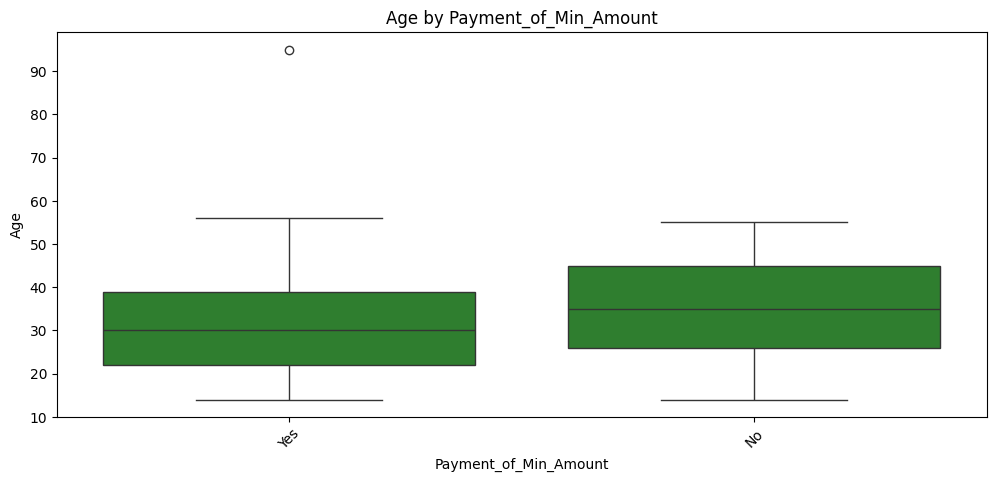

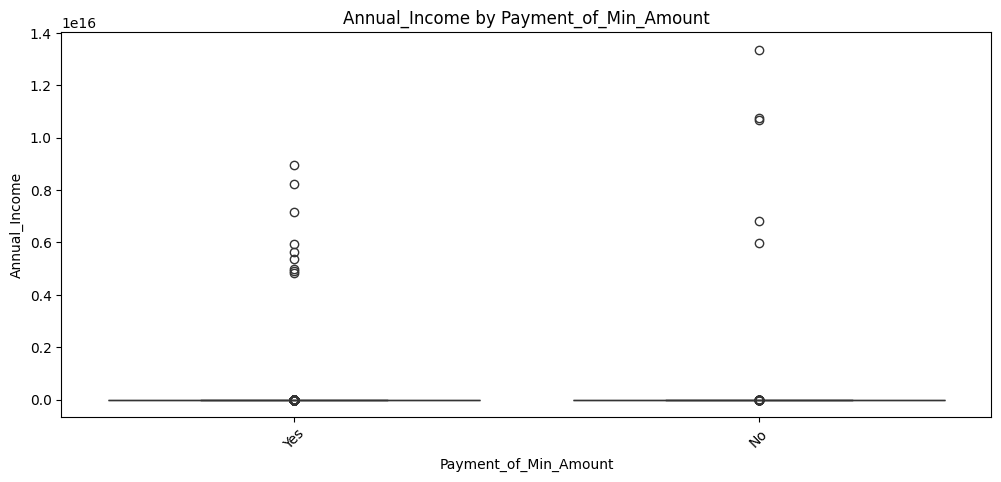

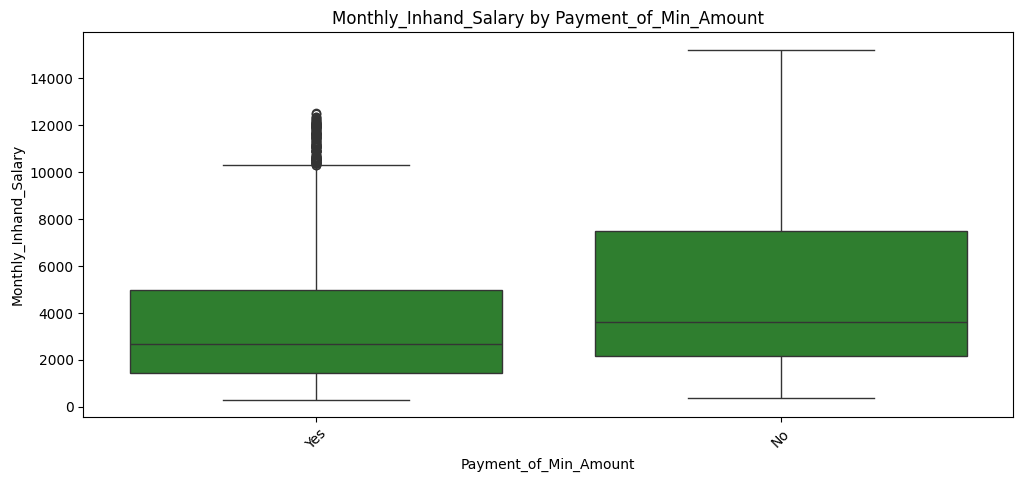

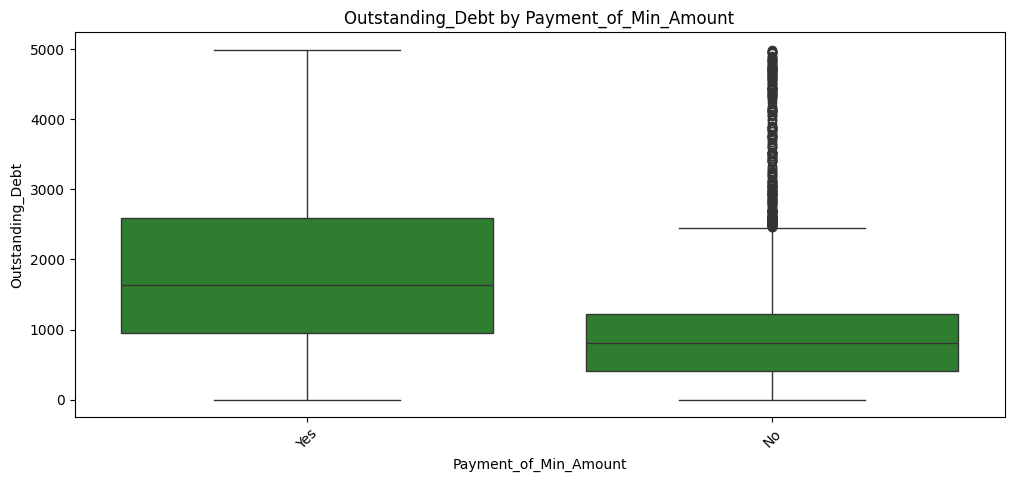

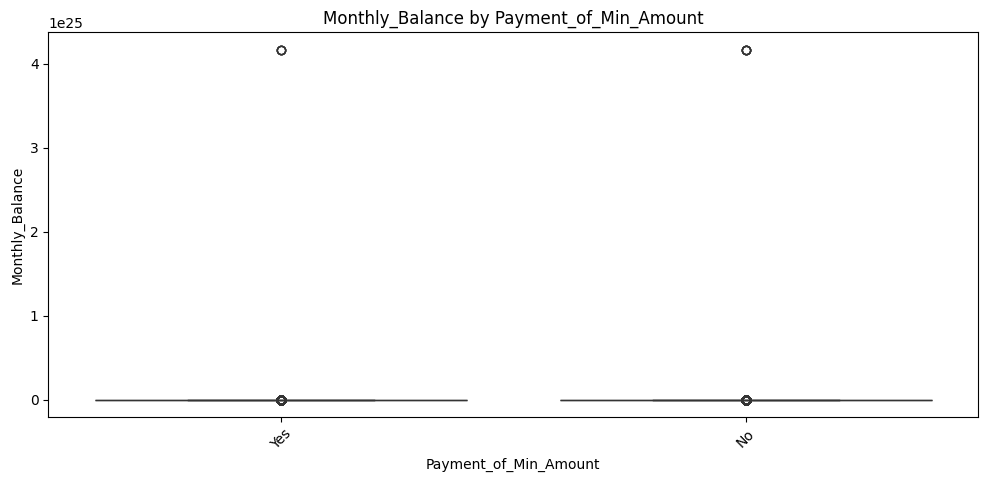

In [303]:
# Categorical vs. Numerical
palette = ['#228B22']
for column in ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']:
    for i, num_column in enumerate(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
        plt.figure(figsize=(12, 5))
        sns.boxplot(x=df_aggregated[column], y=df_aggregated[num_column], palette=palette)
        plt.title(f'{num_column} by {column}')
        plt.xticks(rotation=45)
        plt.show()

In [304]:
# Median values for Credit_Mix
print("Median values for Credit_Mix:")
print("-" * 30)
for elem in (['Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
  print(f"Column Name: {elem}")
  print(df_aggregated.groupby('Credit_Mix')[elem].median())
  print()
  print("-" * 50)

Median values for Credit_Mix:
------------------------------
Column Name: Age
Credit_Mix
Bad         29.0
Good        36.0
Standard    32.0
Name: Age, dtype: float64

--------------------------------------------------
Column Name: Monthly_Inhand_Salary
Credit_Mix
Bad         1879.709167
Good        4509.357500
Standard    2927.622500
Name: Monthly_Inhand_Salary, dtype: float64

--------------------------------------------------
Column Name: Outstanding_Debt
Credit_Mix
Bad         2849.38
Good         732.22
Standard    1019.44
Name: Outstanding_Debt, dtype: float64

--------------------------------------------------
Column Name: Monthly_Balance
Credit_Mix
Bad         2.559598e+09
Good        3.693380e+09
Standard    3.143079e+09
Name: Monthly_Balance, dtype: float64

--------------------------------------------------


**Observation**


*   Age and Credit Mix:

Individuals with a "Good" credit mix have a median age of 36 years, while those with a "Bad" credit mix have a median age of 29 years.
Standard credit mix users have a median age of 32 years.


*   Monthly Inhand Salary:

Good credit mix individuals have a significantly higher median salary (4,509 USD) compared to those with a bad credit mix (1,879 USD).


*   Outstanding Debt:

Those with a "Bad" credit mix have higher outstanding debt (2,849 USD) compared to those with a "Good" credit mix (732 USD).
Monthly Balance:


*   The monthly balance is highest for "Good" credit mix individuals (3.69 billion) compared to those with "Bad" credit mix (2.56 billion).












In [305]:
# Median values for Payment_of_Min_Amount
print("Median values for Payment_of_Min_Amount:")
print("-" * 45)
for elem in (['Age', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
  print(f"Column Name: {elem}")
  print(df_aggregated.groupby('Payment_of_Min_Amount')[elem].median())
  print()
  print("-" * 50)

Median values for Payment_of_Min_Amount:
---------------------------------------------
Column Name: Age
Payment_of_Min_Amount
No     35.0
Yes    30.0
Name: Age, dtype: float64

--------------------------------------------------
Column Name: Monthly_Inhand_Salary
Payment_of_Min_Amount
No     3621.152084
Yes    2682.483750
Name: Monthly_Inhand_Salary, dtype: float64

--------------------------------------------------
Column Name: Outstanding_Debt
Payment_of_Min_Amount
No      807.0
Yes    1639.9
Name: Outstanding_Debt, dtype: float64

--------------------------------------------------
Column Name: Monthly_Balance
Payment_of_Min_Amount
No     3.490774e+09
Yes    2.825928e+09
Name: Monthly_Balance, dtype: float64

--------------------------------------------------


**Observation**


*   **Age:** Those who pay the minimum amount have a median age of 30, while those who don't pay have a median age of 35.


*   **Monthly Inhand Salary**: Median salary is higher for non-minimum payers (₹3621.15) compared to those paying the minimum amount (₹2682.48).

*   **Outstanding Debt**: Median outstanding debt is higher for minimum payers (₹1639.9) compared to non-payers (₹807.0).


*   **Monthly Balance:** Median monthly balance is higher for non-payers (₹3.49B) compared to those paying the minimum (₹2.83B).



# **Hypothetical Credit Score Calculation** ⏳

In [306]:
# Deep copy
df_cleaned_final = df_cleaned.copy()
df_aggregated_final = df_aggregated.copy()

**Objective:**

To develop a hypothetical credit score calculation methodology inspired by FICO scores using a relevant set of features. The methodology will include calculating scores based on selected features, applying a weighting scheme, and scaling the final scores.

# **Credit Score Calculation** 🧮

## Feature Selection
The selected features for calculating the hypothetical credit score include:


*   **Monthly_Inhand_Salary:** Positively correlates with Monthly Balance, indicating financial health.

*   **Amount_invested_monthly:** Strong correlation with Monthly Balance, affecting savings.
*   **Credit_Utilization_Ratio:** Influences creditworthiness.


* **Outstanding_Debt:** Negatively correlates with Monthly Balance, indicating higher risk.

*   **Num_Credit_Inquiries:** More inquiries may indicate higher credit risk.

*   **Interest_Rate:** Affects borrowing costs.
*   **Num_of_Loan:** Reflects debt obligations.

*   **Delay_from_due_date:** Highlights payment behavior.
*   **Monthly_Balance:** Key measure of financial health.












In [307]:
features = {
    'Monthly_Inhand_Salary': 0.15,
    'Amount_invested_monthly': 0.15,
    'Credit_Utilization_Ratio': 0.10,
    'Outstanding_Debt': 0.10,
    'Num_Credit_Inquiries': 0.10,
    'Interest_Rate': 0.10,
    'Num_of_Loan': 0.10,
    'Delay_from_due_date': 0.10,
    'Monthly_Balance': 0.10
}

In [308]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the selected features
scaler = MinMaxScaler()
df_aggregated_final[list(features.keys())] = scaler.fit_transform(df_aggregated_final[list(features.keys())])

# Calculate credit score
df_aggregated_final['Credit_Score'] = sum(df_aggregated_final[feature] * weight for feature, weight in features.items())

# Scale to 300-850
df_aggregated_final['Credit_Score'] = df_aggregated_final['Credit_Score'] * (850 - 300) + 300

# **Bin scores** 💢

In [309]:
bins = [300, 499, 649, 749, 850]
labels = ['Poor Credit', 'Fair Credit', 'Good Credit', 'Excellent Credit']
df_aggregated_final['Credit_Score_Binned'] = pd.cut(df_aggregated_final['Credit_Score'], bins=bins, labels=labels)

## Distribution of Credit Scores

In [310]:
df_aggregated_final[['Customer_ID','Credit_Score']]

,Customer_ID,Credit_Score
0,CUS_0x1000,533.272064
1,CUS_0x1009,430.711104
2,CUS_0x100b,446.498808
3,CUS_0x1011,474.017582
4,CUS_0x1013,452.441537
...,...,...
12495,CUS_0xff3,428.353262
12496,CUS_0xff4,475.296677
12497,CUS_0xff6,436.181428
12498,CUS_0xffc,560.671254


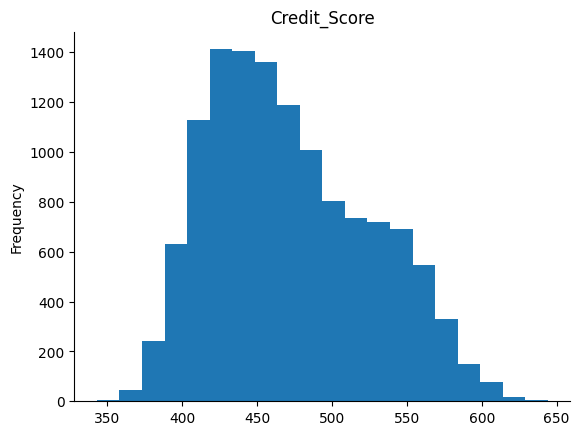

In [311]:
from matplotlib import pyplot as plt
_df_0['Credit_Score'].plot(kind='hist', bins=20, title='Credit_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [312]:
df_aggregated_final['Credit_Score_Binned'].value_counts()

,count
Credit_Score_Binned,
Poor Credit,8738
Fair Credit,3762
Good Credit,0
Excellent Credit,0


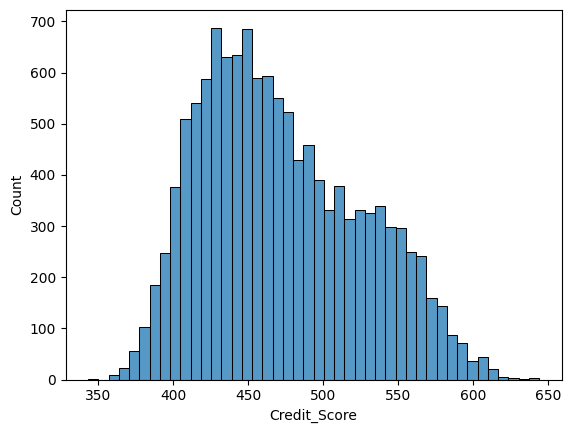

In [313]:
sns.histplot(df_aggregated_final['Credit_Score'])
plt.show()

**Observation**


*   **Increase in Poor Credit Customers:** The number of "Poor Credit" customers has risen to 10,712, reflecting potential financial challenges over the last 3 months.

*   **Drop in Fair Credit Customers:** The "Fair Credit" category has reduced to 1,788, possibly due to recent changes in customer financial behavior.

*   **No Higher Credit Scores:** No customers are classified as "Good" or "Excellent Credit," suggesting limitations in the scoring model.


*   **Impact of Recency, Frequency, Monetary Metrics:** These factors seem to push scores into lower categories, highlighting recent customer activity.

Need for Further Investigation: The changes in credit score distribution suggest re-evaluating the scoring method and feature weights for better accuracy.






# **Insights And Recommendations** ✍



*   **Credit Mix Impact:** Individuals with "Bad" credit have higher debt and lower income than those with "Good" or "Standard" credit, emphasizing the importance of debt reduction for better credit scores.

*   **RFM Analysis:** Recent customer activity and higher spending are linked to better credit behavior, highlighting the significance of recent transactions in credit scoring.
*   **Time Frame Analysis:** Recent behavior strongly predicts creditworthiness, suggesting the value of recency in credit scoring models.


*   **Model Evaluation:** The current model mostly categorizes customers as "Poor Credit," suggesting recalibration and more refined feature selection to improve accuracy.



*   **Debt Management Programs:** Individuals with "Bad" credit often have high outstanding debt. Introducing personalized debt reduction strategies can improve their financial stability and credit scores.

*   **Recency-Driven Credit Scoring:** Place greater emphasis on recent payment behaviors and financial activities in credit scoring, as recent interactions correlate with better credit behavior.

*   **Tailored Financial Products:** Offer targeted financial products for customers in lower credit categories to help them rebuild their credit, such as low-interest loans or educational resources.

These strategies can lead to more effective credit risk management and help customers improve their credit health.

_______________________________________________________________________________


***By***

*Malarvizhi K*

_______________________________________________________________________________





















